In [153]:
import numpy as np
import math
import cmath
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## FHRR Class for basic operations

In [134]:
class hdv:
    dim=0
    def __init__(self, dim=0):
        self.dim = dim
        
    def get_rv(self):
        pass
    
    def bind(self, v1, v2):
        pass
    
    def bundle(self, arr_v):
        pass
    
    def similarity(self, v1, v2):
        pass
    
    def set_dim(self, dim):
        self.dim = dim
        
class FHRR(hdv):
    upper = math.pi
    lower = -math.pi
    def get_rv(self):
        angles = np.random.uniform(self.lower, self.upper, self.dim)
        elems = [cmath.exp(1j*theta) for theta in angles]
        return np.array(elems)
    
    def bind(self, v1, v2):
        return v1 * v2  # Element-wise multiplicationd for binding
    
    def unbind(self, v1, v2):
        return v1 * np.conj(v2)  # Element-wise multiplication with complex conjugate for unbinding
    
    def bundle(self, arr_v):
        return np.sum(arr_v, axis=0)  # Sum of vectors for bundling
    
    def similarity(self, v1, v2):
        angles_v1 = [cmath.polar(c)[1] for c in v1]
        angles_v2 = [cmath.polar(c)[1] for c in v2]
        
        sum_angles = 0
        for i in range(self.dim):
            sum_angles += (cmath.cos(angles_v1[i].real - angles_v2[i].real)).real
            
        return sum_angles / self.dim
    
    

## Canvas functions

In [124]:
def generate_grid_vectors(canvas_size, num_x_cells, num_y_cells, D):
    """
    Generates random complex vectors for grid lines.

    :param canvas_size: Tuple (width, height) of the canvas.
    :param num_x_cells: Number of grid cells along the X direction.
    :param num_y_cells: Number of grid cells along the Y direction.
    :param D: Dimension of the complex vectors.
    :return: Dicts of complex vectors for X and Y grid lines.
    """
    width, height = canvas_size
    x_grid_lines = np.linspace(0, width, num_x_cells + 1)
    y_grid_lines = np.linspace(0, height, num_y_cells + 1)
    
    x_vectors = {x: np.random.randn(D) + 1j * np.random.randn(D) for x in x_grid_lines}
    y_vectors = {y: np.random.randn(D) + 1j * np.random.randn(D) for y in y_grid_lines}
    
    return x_grid_lines, y_grid_lines, x_vectors, y_vectors

def get_relevant_vector(x_grid_lines, y_grid_lines, x_vectors, y_vectors, pixel_location):
    """
    Gets the relevant vector for a given pixel location by combining parts of the closest grid line vectors.

    :param x_grid_lines: X grid lines positions.
    :param y_grid_lines: Y grid lines positions.
    :param x_vectors: Complex vectors for X grid lines.
    :param y_vectors: Complex vectors for Y grid lines.
    :param pixel_location: Tuple (x, y) of the pixel location.
    :return: A bound complex vector for the pixel location using FHRR.
    """
    x, y = pixel_location
    
    # Find closest grid lines in the X direction
    x1 = max([gx for gx in x_grid_lines if gx <= x], default=x_grid_lines[0])
    x2 = min([gx for gx in x_grid_lines if gx >= x], default=x_grid_lines[-1])
    
    # Find closest grid lines in the Y direction
    y1 = max([gy for gy in y_grid_lines if gy <= y], default=y_grid_lines[0])
    y2 = min([gy for gy in y_grid_lines if gy >= y], default=y_grid_lines[-1])
    
    # Calculate interpolation ratios
    t_x = (x - x1) / (x2 - x1) if x2 != x1 else 0
    t_y = (y - y1) / (y2 - y1) if y2 != y1 else 0
    
    # Interpolate between the complex vectors
    
    x_vector = interpolate_vectors(x_vectors[x1], x_vectors[x2], t_x)
    y_vector = interpolate_vectors(y_vectors[y1], y_vectors[y2], t_y)

    # print(x_vectors[x1].shape, x_vectors[x2].shape, x_vector.shape, t_x, t_y)
    
    # Use FHRR to bind x_vector and y_vector
    fhrr = FHRR(len(x_vector))
    # print(x_vector.shape, y_vector.shape)
    bound_vector = fhrr.bind(x_vector, y_vector)
    
    return bound_vector

def interpolate_vectors(v1, v2, t):
    """
    Interpolates between two vectors by selecting parts of each based on the ratio t.

    :param v1: First complex vector.
    :param v2: Second complex vector.
    :param t: Interpolation ratio.
    :return: Interpolated complex vector.
    """

    if t==0:
        return v1
    if t==1:
        return v2
    
    len_v1_part = int(len(v1) * (1 - t))
    len_v2_part = len(v2) - len_v1_part
    
    v1_part = v1[:len_v1_part]
    v2_part = v2[-len_v2_part:]
    
    return np.concatenate([v1_part, v2_part])


### Test the functions

In [141]:
canvas_size = (100, 100)
num_x_cells = 10
num_y_cells = 10
D = 1000  # Dimension of the complex vector

# Generate grid lines and vectors
x_grid_lines, y_grid_lines, x_vectors, y_vectors = generate_grid_vectors(canvas_size, num_x_cells, num_y_cells, D)

# Get the relevant vector for a specific pixel location
pixel_location = (43, 53)
relevant_vector = get_relevant_vector(x_grid_lines, y_grid_lines, x_vectors, y_vectors, pixel_location)

# # Print the result
# print("Relevant X vector:", relevant_x_vector)
# print("Relevant Y vector:", relevant_y_vector)


In [144]:
x_vectors.keys()

dict_keys([0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0])

## Prepare the Canvas

In [145]:
# Load the MNIST dataset using sklearn
mnist = fetch_openml('mnist_784', version=1)
images = mnist.data.values.reshape(-1, 28, 28)
labels = mnist.target.astype(int)


In [168]:
fhrr_vector.shape

(784,)

In [165]:
print(0, df[df['class'] == 0].count())
print(1, df[df['class'] == 1].count())
print(2, df[df['class'] == 2].count())
print(3, df[df['class'] == 3].count())
print(4, df[df['class'] == 4].count())
print(5, df[df['class'] == 5].count())
print(6, df[df['class'] == 6].count())
print(7, df[df['class'] == 7].count())
print(8, df[df['class'] == 8].count())
print(9, df[df['class'] == 9].count())


0 class    6903
dtype: int64
1 class    7877
dtype: int64
2 class    6990
dtype: int64
3 class    7141
dtype: int64
4 class    6824
dtype: int64
5 class    6313
dtype: int64
6 class    6876
dtype: int64
7 class    7293
dtype: int64
8 class    6825
dtype: int64
9 class    6958
dtype: int64


In [ ]:

# Select one image of each of four different digits
selected_digits = [0, 1, 2, 3]
selected_images = []

for digit in selected_digits:
    # Find the first image in the dataset that matches the current digit
    index = np.where(labels == digit)[0][0]
    selected_images.append(images[index])

# Reinitialize the canvas with the correct variable
canvas_size = (100, 100)
canvas = np.zeros(canvas_size)

# List to keep track of placed images' positions
positions = []

# Function to check if the new position overlaps with existing images
def check_overlap(new_pos, size):
    for pos in positions:
        if not (new_pos[0] + size[0] <= pos[0] or
                new_pos[0] >= pos[0] + 28 or
                new_pos[1] + size[1] <= pos[1] or
                new_pos[1] >= pos[1] + 28):
            return True
    return False

# Place each selected digit image at a random position on the canvas
for image in selected_images:
    while True:
        x_offset = np.random.randint(0, canvas_size[0] - image.shape[0])
        y_offset = np.random.randint(0, canvas_size[1] - image.shape[1])
        if not check_overlap((x_offset, y_offset), image.shape):
            canvas[x_offset:x_offset + image.shape[0], y_offset:y_offset + image.shape[1]] = image
            positions.append((x_offset, y_offset))
            break

# Display the final image
plt.figure(figsize=(5, 5))
plt.imshow(canvas, cmap='gray')
plt.axis('off')
plt.show()


In [126]:
print(selected_digits)
print(positions)

[0, 1, 2, 3]
[(53, 24), (65, 61), (2, 9), (17, 71)]


In [128]:
def similarity_heatmap(canvas_size, num_x_cells, num_y_cells, D, pixel_location):
    """
    Generate and visualize the heatmap of similarity for a given pixel location.

    :param canvas_size: Tuple (width, height) of the canvas.
    :param num_x_cells: Number of grid cells along the X direction.
    :param num_y_cells: Number of grid cells along the Y direction.
    :param D: Dimension of the complex vectors.
    :param pixel_location: Tuple (x, y) of the pixel location to evaluate.
    """
    # Generate grid lines and vectors
    # x_grid_lines, y_grid_lines, x_vectors, y_vectors = generate_grid_vectors(canvas_size, num_x_cells, num_y_cells, D)
    
    # Create a blank canvas to store similarity values
    similarity_map = np.zeros(canvas_size)
    fhrr = FHRR(D)
    
    # Calculate similarity for each pixel
    for x in range(canvas_size[0]):
        for y in range(canvas_size[1]):
            # Get the interpolated vector for the current pixel
            interpolated_vector = get_relevant_vector(x_grid_lines, y_grid_lines, x_vectors, y_vectors, (x, y))
            
            # Calculate similarity to the dummy point's vectors (using dot product as similarity measure)
            dummy_x_vector = get_relevant_vector(x_grid_lines, y_grid_lines, x_vectors, y_vectors, pixel_location)
            
            # similarity = np.abs(np.dot(interpolated_vector, dummy_x_vector.conjugate()))
            similarity = fhrr.similarity(interpolated_vector, dummy_x_vector)
            
            # Store the combined similarity
            similarity_map[x, y] = similarity
    
    # Visualize the similarity map as a heatmap
    plt.figure(figsize=(8, 8))
    sns.heatmap(similarity_map, cmap='coolwarm', square=True)
    plt.title(f"Heatmap of Similarity to Pixel at {pixel_location}")
    plt.xlabel("X coordinate")
    plt.ylabel("Y coordinate")
    plt.show()

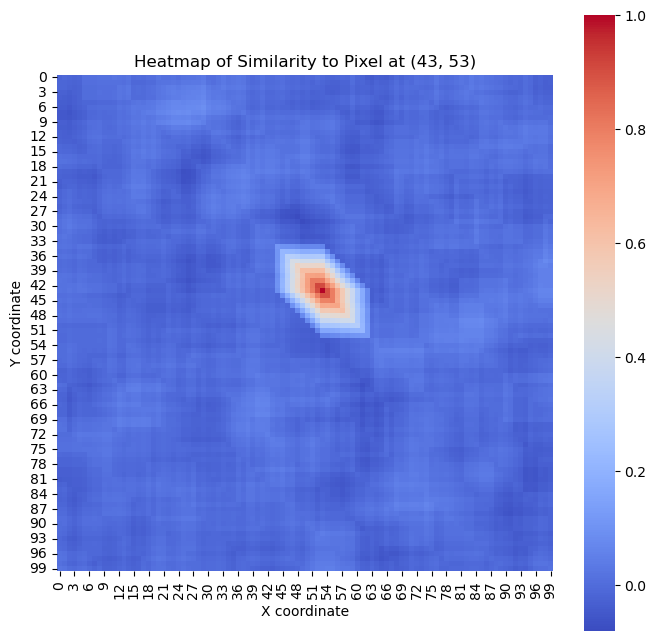

In [129]:
similarity_heatmap(canvas_size, num_x_cells, num_y_cells, D, pixel_location)

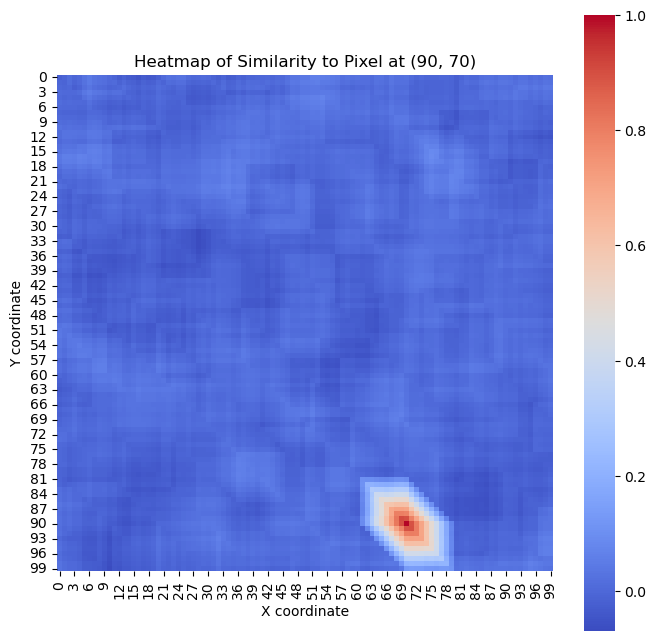

In [130]:
similarity_heatmap(canvas_size, num_x_cells, num_y_cells, D, (90, 70))

In [131]:
# Assuming D is already defined (D = 1000 from your previous code)
D = 1000

# Create a list of 100 random complex vectors
random_vectors = [np.random.randn(D) + 1j * np.random.randn(D) for _ in range(100)]

# Assign vectors to the digits used (0, 1, 2, 3)
digit_vectors = {
    0: random_vectors[0],
    1: random_vectors[1],
    2: random_vectors[2],
    3: random_vectors[3]
}

# Print the shape of one of the vectors to verify
print(f"Shape of vector for digit 0: {digit_vectors[0].shape}")

Shape of vector for digit 0: (1000,)


In [132]:
positions[i]

(53, 24)

In [133]:
pos_enocded_digit = {}

fhrr = FHRR(D)
i=0
for key, value in digit_vectors.items():
    cord_vec = get_relevant_vector(num_x_cells, num_y_cells, x_vectors, y_vectors, positions[i])
    pos_enocded_digit[ key ] = fhrr.bind(value, cord_vec)
    i+=1

TypeError: 'int' object is not iterable